In [1]:
from aiida.plugins import DataFactory
import aiida
aiida.load_profile()

Profile<uuid='aaaefae20eac49f892e60b4593a470e3' name='quicksetup'>


1. 元素を与えてdefaultの格子を得る
1. 格子定数を定数倍した格子（複数）を得る
1. それらの格子の体積を平均する。

を行う。

以下の元コードはAiiDA tutorialから取っている。


In [2]:
from aiida.engine import calcfunction,workfunction
import numpy as np
    
@calcfunction
def load_poscar(element):
    symbol = element.value
    from pymatgen.core.structure import Structure
    filename = "POSCAR."+symbol
    struc = Structure.from_file(filename)
    StructureData = DataFactory("structure")
    structure = StructureData()
    structure.set_pymatgen(struc)
    return structure

In [3]:
@calcfunction
def rescale(structure, scale):
    """
    Workfunction to rescale a structure

    :param structure: An AiiDA structure to rescale
    :param scale: The scale factor (for the lattice constant)
    :return: The rescaled structure
    """
    the_ase = structure.get_ase()
    new_ase = the_ase.copy()
    new_ase.set_cell(the_ase.get_cell() * scale.value, scale_atoms=True)
    new_structure = DataFactory('structure')(ase=new_ase)
    return new_structure

@calcfunction
def struc2volume(struture):
    struc = struture.get_pymatgen()
    return Float(struc.volume)

In [4]:
@workfunction
def create_rescaled(element, scale):
    """
    Workfunction to create and immediately rescale
    a crystal structure of a given element.
    """
    s0 = load_poscar(element)
    return rescale(s0,scale)


In [5]:
from aiida.orm import Str,Float
import numpy as np
from aiida.plugins import DataFactory

1. 元素を与えてdefaultの格子を得る
1. 格子定数を定数倍した格子（複数）を得る

までを行う。

@workfunctionの入出力はAiiDAの型でなければいけない。
- 入力はStr
- 出力はarray

を用いる。


次のセルのコードは正しい答えは出るが、AiiDAがエラーを起こす。

volumeをvolume listにする際にlinkが繋がっていないからである。

In [6]:
@workfunction
def average_structures_volume(element,factors_array):
    s0 = load_poscar(element)
    print("s0", s0.pk)
    volume_list = []
    for factor in factors_array.get_array("vector"):
        rescaled_structure = rescale(s0, Float(factor))
        print("rescaled_structure",rescaled_structure)
        
        # here the link is broken.
        volume_list.append(struc2volume(rescaled_structure).value)
        
    volume_avg = np.average(volume_list)
    print(volume_avg)
    return Float(volume_avg)

factors = np.array([0.98, 0.99, 1.0, 1.1, 1.2])
ArrayData = DataFactory('core.array')
factors_array = ArrayData()
factors_array.set_array("vector",factors )

volume_avg = average_structures_volume(element= Str("Si"), factors_array=factors_array)
volume_avg

/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


s0 9553


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: b3b1c4bc-e7de-40d9-9b8f-82d22dc33e9a (pk: 9556)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 6268e996-8c70-415a-922d-1d6ae73aefe2 (pk: 9561)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 21b9a42b-87a3-48e6-9607-80fecc4f9590 (pk: 9566)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 4360349a-2a55-4989-b10e-0fc79f335034 (pk: 9571)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: d0959c15-a74e-4290-b285-ba2739dff68c (pk: 9576)


12/04/2024 08:28:39 PM <5545> aiida.orm.nodes.process.workflow.workfunction.WorkFunctionNode: [REPORT] [9551|average_structures_volume|on_except]: Traceback (most recent call last):
  File "/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/plumpy/base/state_machine.py", line 324, in transition_to
    self._enter_next_state(new_state)
  File "/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/plumpy/base/state_machine.py", line 388, in _enter_next_state
    self._fire_state_event(StateEventHook.ENTERED_STATE, last_state)
  File "/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/plumpy/base/state_machine.py", line 300, in _fire_state_event
    callback(self, hook, state)
  File "/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/plumpy/processes.py", line 334, in <lambda>
    lambda _s, _h, from_state: self.on_entered(cast(Optional[process_states.State], from_state)),
  File "/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida

47.821088881098


ValueError: Workflow<average_structures_volume> tried returning an unstored `Data` node. This likely means new `Data` is being created inside the workflow. In order to preserve data provenance, use a `calcfunction` to create this node and return its output from the workflow


次はエラーが起きないように、
@calcfunctionで繋げる。



In [7]:
@calcfunction 
def average_volume5(s1,s2,s3,s4,s5):
    print(s1.pk,s2.pk, s3.pk, s4.pk, s5.pk)
    v = np.array([s1.value,s2.value,s3.value,s4.value, s5.value])
    return Float(np.average(v))

@workfunction
def average_structures_volume(element, factors_array):
    s0 = load_poscar(element)
    print("s0", s0.pk)
    volume_list = []
    for factor in factors_array.get_array("vector"):
        rescaled_structure = rescale(s0, Float(factor))
        print("rescaled_structure",rescaled_structure)
        # here the link is broken.
        volume_list.append(struc2volume(rescaled_structure))
        
    volume_avg = average_volume5(volume_list[0],volume_list[1],volume_list[2],
                          volume_list[3],volume_list[4])
    print(volume_avg)
    return volume_avg

factors = np.array([0.98, 0.99, 1.0, 1.1, 1.2])
ArrayData = DataFactory('array')
factors_array = ArrayData()
factors_array.set_array("vector",factors )

volume_avg = average_structures_volume(element= Str("Si") , factors_array=factors_array)
volume_avg

/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `array` is deprecated. Please replace it with `core.array`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)
/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


s0 9583


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 36d4375c-f140-4f15-b019-55b6dd775856 (pk: 9586)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 00120eda-13d8-47e0-8c95-afed92779052 (pk: 9591)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 19e28ae8-33ba-4470-8a5d-3824c1c13d6f (pk: 9596)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 10a2d8f4-1463-4b88-8e9a-09f6b5ae5375 (pk: 9601)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 625f4cbe-aa42-4d1d-a283-40481d446eec (pk: 9606)
9588 9593 9598 9603 9608
uuid: 24a09cab-4e2e-4829-ada2-8dd5bb7718d1 (pk: 9610) value: 47.821088881098


<Float: uuid: 24a09cab-4e2e-4829-ada2-8dd5bb7718d1 (pk: 9610) value: 47.821088881098>

Success: Output written to `9610.dot.pdf`


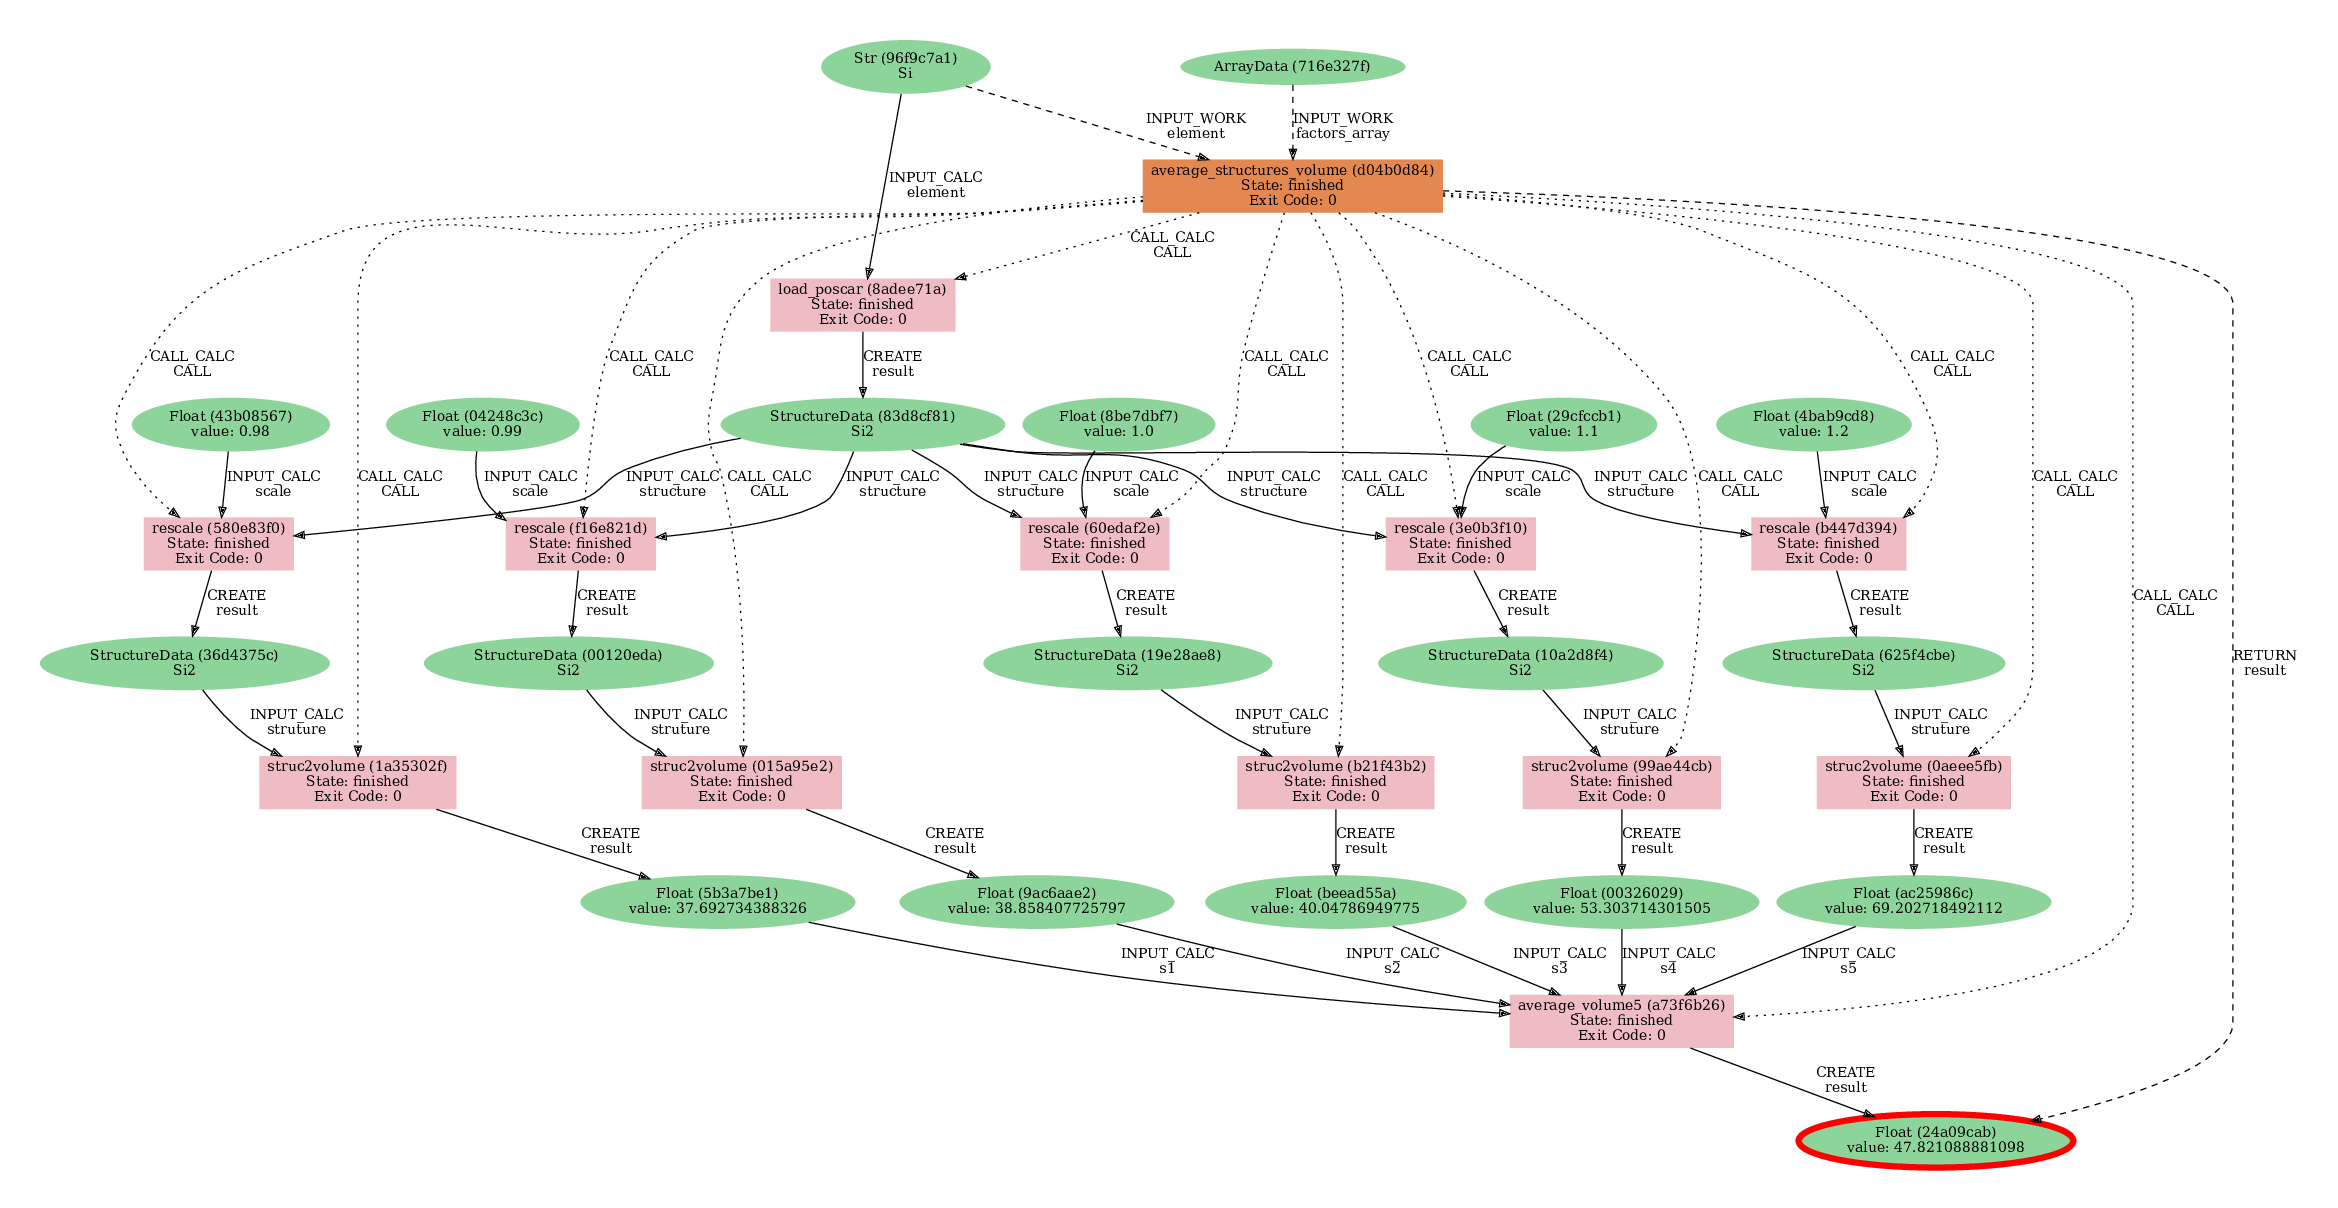

In [8]:
import subprocess
pk = volume_avg.pk
cmd = "verdi node graph generate {}".format(pk)
subprocess.call(cmd,shell=True)

from wand.image import Image as WImage
WImage(filename="{}.dot.pdf".format(pk))

In [9]:
from aiida.orm import Dict
@calcfunction 
def _pack_calculations(**kwargs):
    print("pack",kwargs)
    result = [result for label, result in kwargs.items()]
    return Dict(dict={'volumes':result})

@calcfunction
def _volume_average(calculations):
    print("_volume_average.calculations", calculations)
    volumes = calculations["volumes"]
    volume_avg = np.average(volumes)
    print("volume_avg", volume_avg)
    return Float(volume_avg)

@workfunction
def average_structures_volume(element, factors_array):
    s0 = load_poscar(element)
    print("s0", s0.pk)
    volumes = {}
    for i, factor in enumerate(factors_array.get_array("vector")):
        rescaled_structure = rescale(s0, Float(factor))
        print("rescaled_structure",rescaled_structure)
        # here the link is broken.
        volumes["factor{}".format(i)] = struc2volume(rescaled_structure)

    print(volumes)
    volume_array = _pack_calculations(**volumes)
    
    volume_avg = _volume_average(volume_array)
    print(volume_avg)
    return volume_avg

factors = np.array([0.98, 0.99, 1.0, 1.1, 1.2])
ArrayData = DataFactory('array')
factors_array = ArrayData()
factors_array.set_array("vector",factors )

volume_avg = average_structures_volume(element= Str("Si") , factors_array=factors_array)
volume_avg

/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `array` is deprecated. Please replace it with `core.array`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)
/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


s0 9615


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 4e71ea1f-6c64-467f-b658-0c539e4fa7fe (pk: 9618)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: a819d620-e993-4673-bceb-1a58ac1d80b4 (pk: 9623)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 1df69ef8-75f6-4977-8ab0-5cff613b81bf (pk: 9628)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 86418784-16dd-4e3d-83e0-c807d3c97b91 (pk: 9633)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 5362eca3-fb6c-4eb6-bb08-b372299a3f3c (pk: 9638)
{'factor0': <Float: uuid: d3b7002b-5e3d-49fd-abc5-560703f59c2d (pk: 9620) value: 37.692734388326>, 'factor1': <Float: uuid: 2cca85c0-c695-4336-a511-b29adb7179a2 (pk: 9625) value: 38.858407725797>, 'factor2': <Float: uuid: f2c48a3f-c2fb-4503-9a53-b857a41a3671 (pk: 9630) value: 40.04786949775>, 'factor3': <Float: uuid: 21a3218c-eac0-48f8-ad4c-90da0abddae6 (pk: 9635) value: 53.303714301505>, 'factor4': <Float: uuid: 5796ac32-3d09-4a55-a16f-ba1a9eee8d62 (pk: 9640) value: 69.202718492112>}
pack {'factor0': <Float: uuid: d3b7002b-5e3d-49fd-abc5-560703f59c2d (pk: 9620) value: 37.692734388326>, 'factor1': <Float: uuid: 2cca85c0-c695-4336-a511-b29adb7179a2 (pk: 9625) value: 38.858407725797>, 'factor2': <Float: uuid: f2c48a3f-c2fb-4503-9a53-b857a41a3671 (pk: 9630) value: 40.04786949775>, 'factor3': <Float: uuid: 21a3218c-eac0-48f8-ad4c-90da0abddae6 (pk: 9635) value: 53.303714301505>, 'factor4': <Float: uuid: 5796ac32-3d09-4

<Float: uuid: f252bfdd-6d00-4790-8edb-37bdb242f2cd (pk: 9644) value: 47.821088881098>

Success: Output written to `9644.dot.pdf`


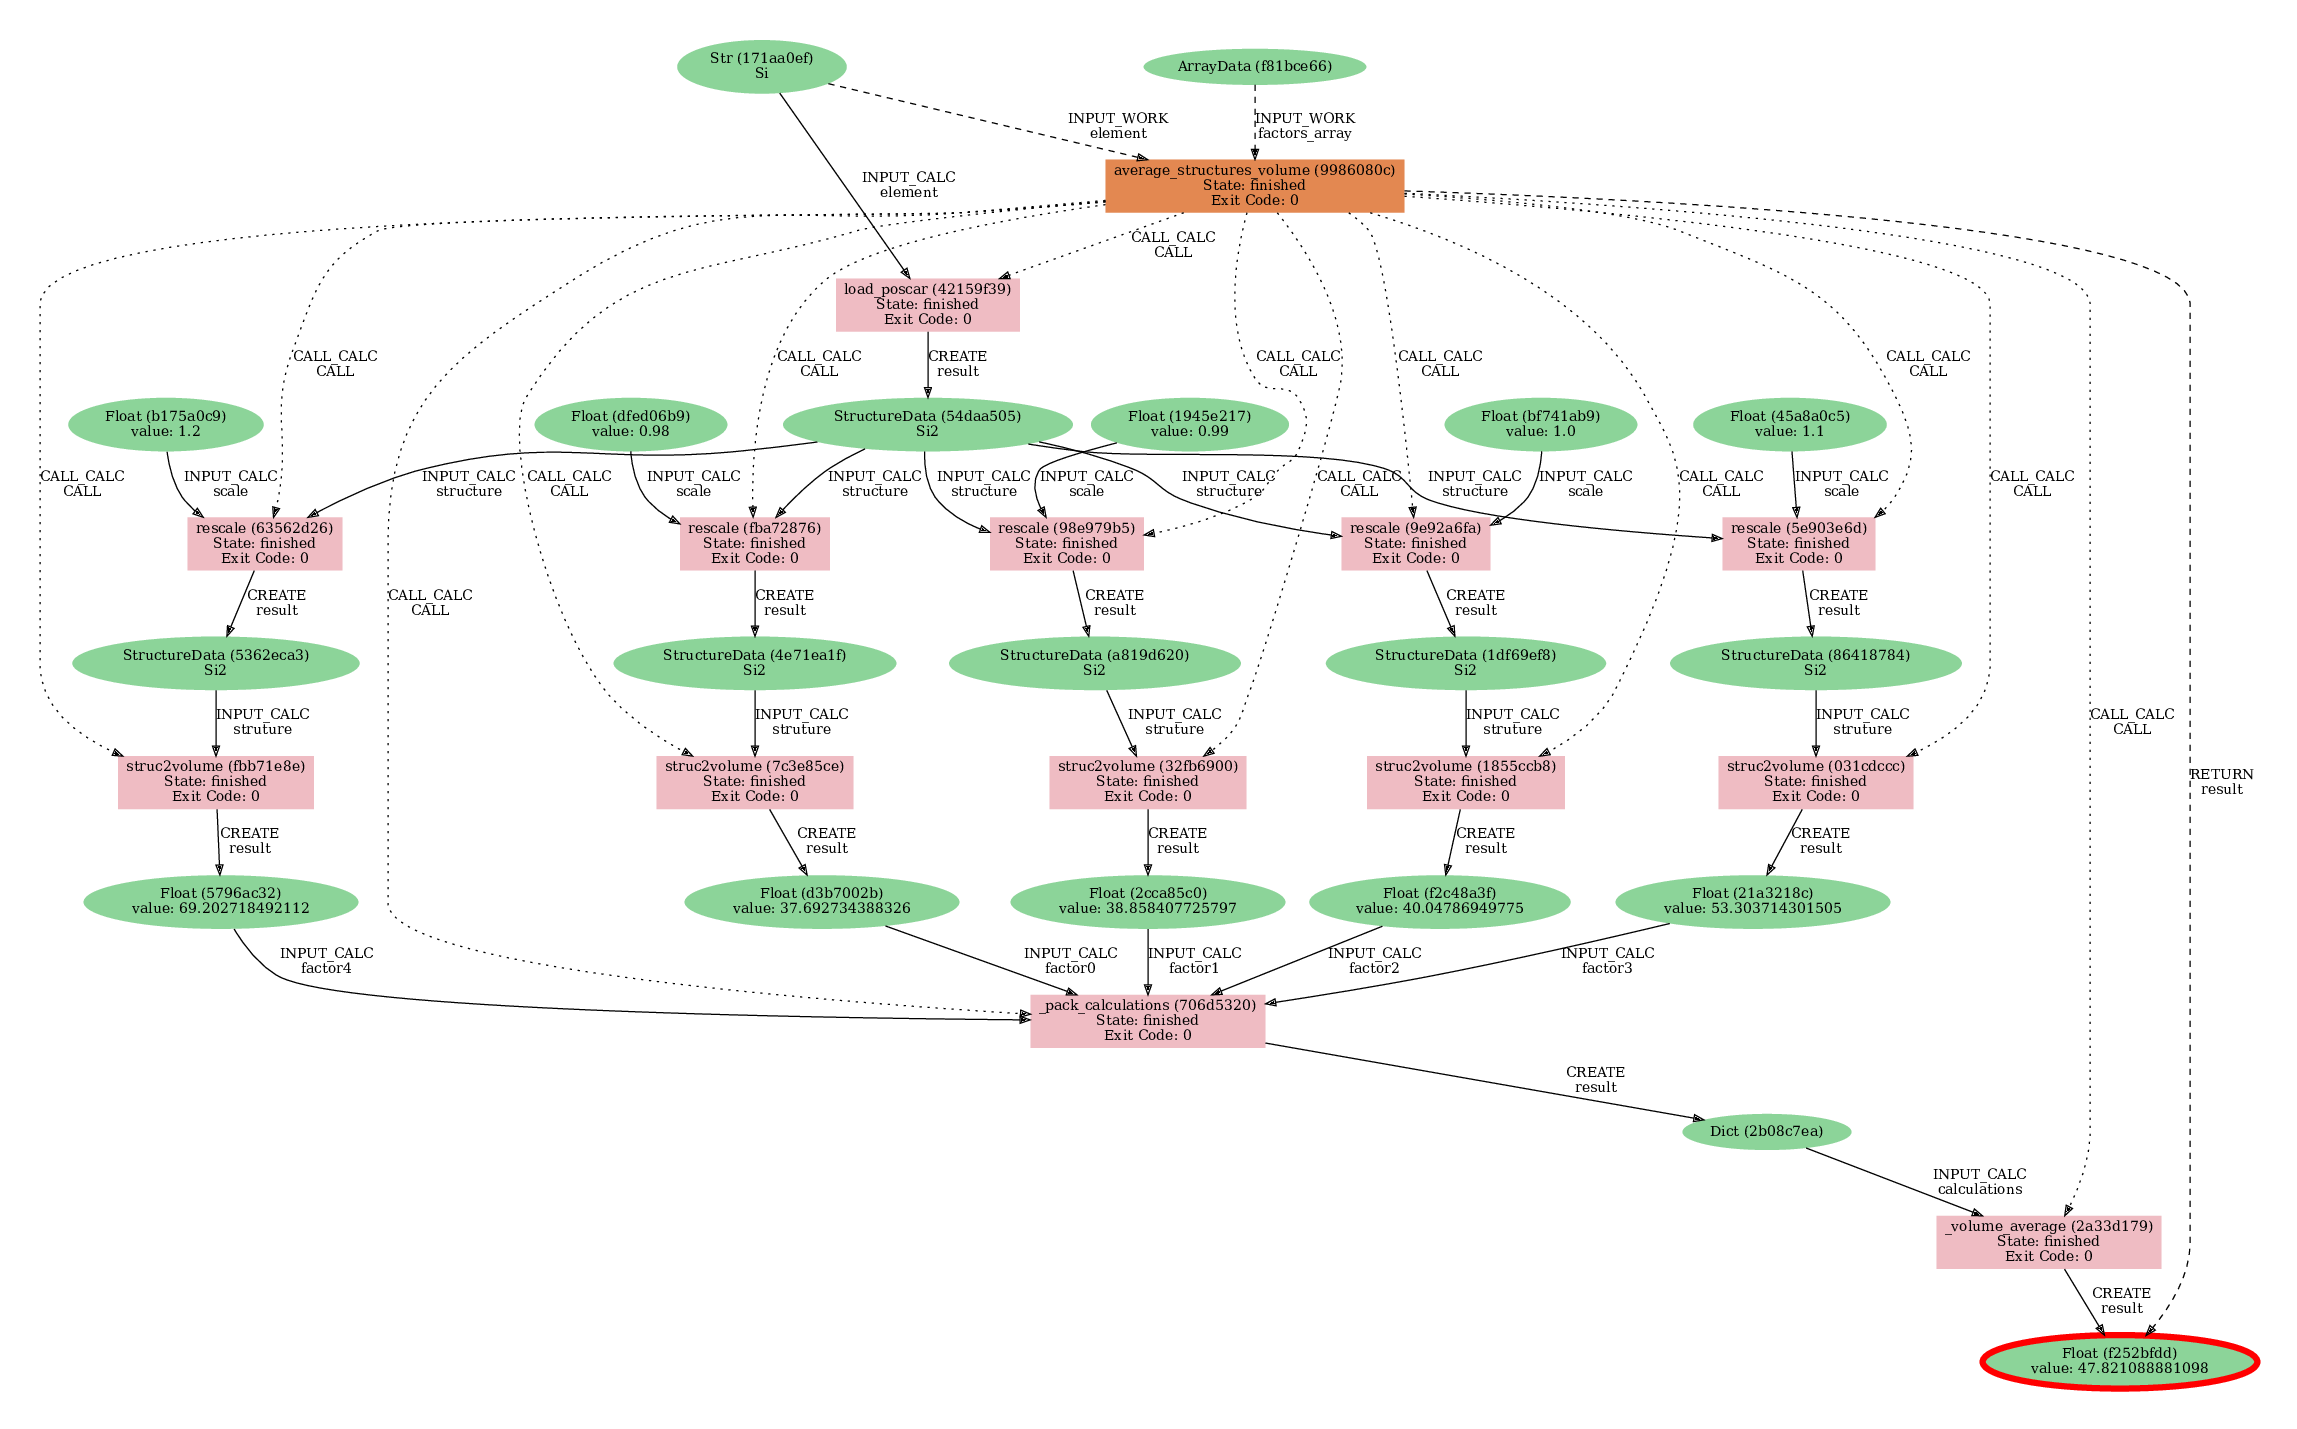

In [10]:
import subprocess
pk = volume_avg.pk
cmd = "verdi node graph generate {}".format(pk)
subprocess.call(cmd,shell=True)

from wand.image import Image as WImage
WImage(filename="{}.dot.pdf".format(pk))

\_pack_calculationsを変える。

一般にはDictにしてしまうのか簡単だが、
\_pack_calculationsの戻り値をDataFactory('array')にすることも可能。

AiiDAの型とnumpyの型に注意すること。

In [15]:
from aiida.orm import Dict
@calcfunction 
def _pack_calculations(**kwargs):
    print("pack",kwargs)
    result = np.array([result.value for label, result in kwargs.items()])
    print("result",result)
    ArrayData = DataFactory('core.array')
    factors_array = ArrayData()
    factors_array.set_array("vector",result )
    return factors_array

@calcfunction
def _volume_average(calculations):
    print("_volume_average.calculations", calculations)
    volumes = calculations.get_array("vector")
    volume_avg = np.average(volumes)
    print("volume_avg", volume_avg)
    return Float(volume_avg)

@workfunction
def average_structures_volume(element, factors_array):
    s0 = load_poscar(element)
    print("s0", s0.pk)
    volumes = {}
    for i, factor in enumerate(factors_array.get_array("vector")):
        rescaled_structure = rescale(s0, Float(factor))
        print("rescaled_structure",rescaled_structure)
        # here the link is broken.
        volumes["factor{}".format(i)] = struc2volume(rescaled_structure)

    print(volumes)
    volume_array = _pack_calculations(**volumes)
    
    volume_avg = _volume_average(volume_array)
    print(volume_avg)
    return volume_avg

factors = np.array([0.98, 0.99, 1.0, 1.1, 1.2])
ArrayData = DataFactory('core.array')
factors_array = ArrayData()
factors_array.set_array("vector",factors )

volume_avg = average_structures_volume(element= Str("Si") , factors_array=factors_array)
volume_avg

/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


s0 9715


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 3523f05d-5435-4c96-b960-19ff9b4dcfb1 (pk: 9718)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: b73a30ac-81cc-48fa-b779-83c34b33f4bd (pk: 9723)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: e78b3245-9165-4167-8f65-1dc5790c105e (pk: 9728)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: d9ece4aa-0dac-4093-a00b-8bed8486271c (pk: 9733)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 8a0ec37f-655a-4e51-ac2f-86549532f73f (pk: 9738)
{'factor0': <Float: uuid: 2eaff3b3-eee0-46da-abb8-58da395057b4 (pk: 9720) value: 37.692734388326>, 'factor1': <Float: uuid: 01cb1960-5d02-43e1-bf3d-00e55c0c79ed (pk: 9725) value: 38.858407725797>, 'factor2': <Float: uuid: d36899ed-a39b-43d1-ae4c-178f8bff4aaa (pk: 9730) value: 40.04786949775>, 'factor3': <Float: uuid: 663627ae-b35a-4e82-82b8-4871762b891a (pk: 9735) value: 53.303714301505>, 'factor4': <Float: uuid: fe187e31-330c-485f-b897-dd3ba4ec94d0 (pk: 9740) value: 69.202718492112>}
pack {'factor0': <Float: uuid: 2eaff3b3-eee0-46da-abb8-58da395057b4 (pk: 9720) value: 37.692734388326>, 'factor1': <Float: uuid: 01cb1960-5d02-43e1-bf3d-00e55c0c79ed (pk: 9725) value: 38.858407725797>, 'factor2': <Float: uuid: d36899ed-a39b-43d1-ae4c-178f8bff4aaa (pk: 9730) value: 40.04786949775>, 'factor3': <Float: uuid: 663627ae-b35a-4e82-82b8-4871762b891a (pk: 9735) value: 53.303714301505>, 'factor4': <Float: uuid: fe187e31-330c-4

<Float: uuid: 939562da-4deb-4e86-acdd-450b00411da8 (pk: 9744) value: 47.821088881098>

Success: Output written to `9678.dot.pdf`


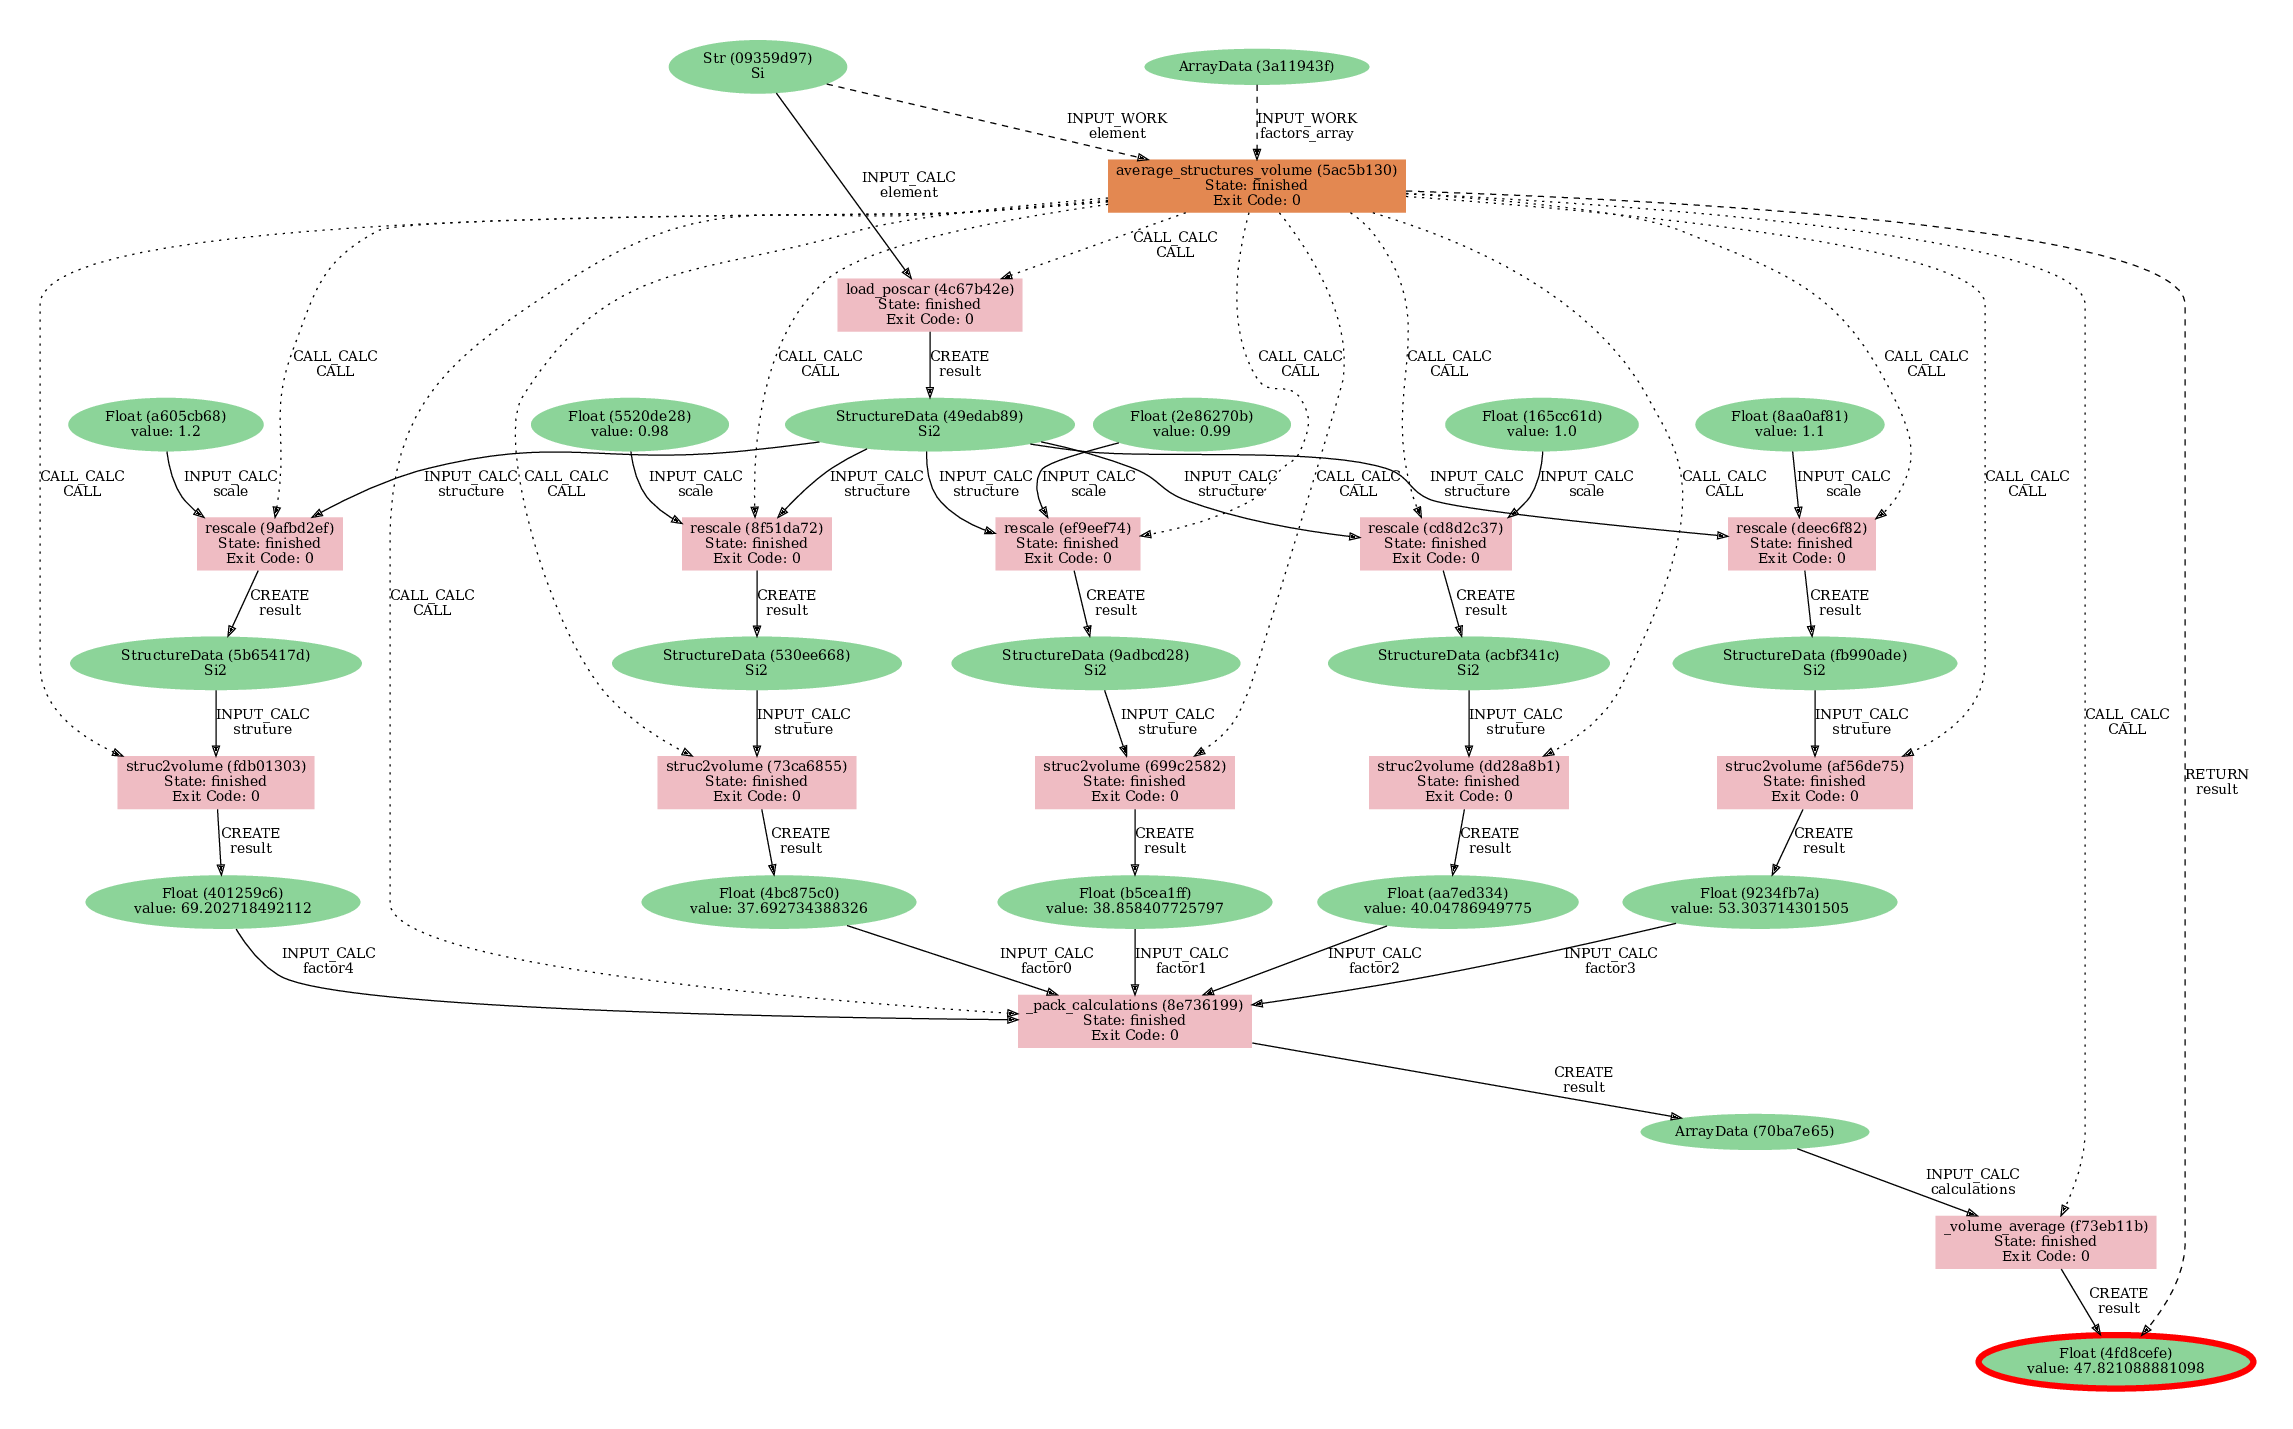

In [12]:
import subprocess
pk = volume_avg.pk
cmd = "verdi node graph generate {}".format(pk)
subprocess.call(cmd,shell=True)

from wand.image import Image as WImage
WImage(filename="{}.dot.pdf".format(pk))

\_pack_calculationsを経由しなくても計算可能。

AiiDAの型とnumpyの型に注意すること。

In [13]:
from aiida.orm import Dict
@calcfunction 
def _average_volumes(**kwargs):
    print("pack",kwargs)
    volumes = [result.value for label, result in kwargs.items()]
    print("volumes",volumes)
    volume_avg = np.average(volumes)
    print("volume_avg", volume_avg)
    return Float(volume_avg)

@workfunction
def average_structures_volume(element, factors_array):
    s0 = load_poscar(element)
    print("s0", s0.pk)
    volumes = {}
    for i, factor in enumerate(factors_array.get_array("vector")):
        rescaled_structure = rescale(s0, Float(factor))
        print("rescaled_structure",rescaled_structure)
        # here the link is broken.
        volumes["factor{}".format(i)] = struc2volume(rescaled_structure)
    
    volume_avg = _average_volumes(**volumes)
    print(volume_avg)
    return volume_avg

factors = np.array([0.98, 0.99, 1.0, 1.1, 1.2])
ArrayData = DataFactory('core.array')
factors_array = ArrayData()
factors_array.set_array("vector",factors )

volume_avg = average_structures_volume(element= Str("Si") , factors_array=factors_array)
volume_avg

/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `array` is deprecated. Please replace it with `core.array`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)
/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


s0 9683


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 02b93927-519a-44d2-b896-7541f2a4074d (pk: 9686)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 7ca82c29-8153-446f-8930-3b106f4110c9 (pk: 9691)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: c10ce365-ad86-46fe-96e3-7ecac35c08fa (pk: 9696)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: dd637c59-1b9d-40e7-a8db-a45e0af19b9d (pk: 9701)


/home/kino/miniconda3/envs/aiida/lib/python3.10/site-packages/aiida/plugins/entry_point.py:350: AiidaDeprecationWarning: The entry point `structure` is deprecated. Please replace it with `core.structure`. (this will be removed in v3)
  warn_deprecation(f'The entry point `{name}` is deprecated. Please replace it with `core.{name}`.', version=3)


rescaled_structure uuid: 32512bad-df81-47be-a6d5-05a97bca25b5 (pk: 9706)
pack {'factor0': <Float: uuid: 6440a046-3d08-465e-8a3e-eb5854220d8a (pk: 9688) value: 37.692734388326>, 'factor1': <Float: uuid: 58830bca-acb4-476b-bbc5-a3ae66dac9d0 (pk: 9693) value: 38.858407725797>, 'factor2': <Float: uuid: d38eec38-da36-4c76-9675-06ba01d3403f (pk: 9698) value: 40.04786949775>, 'factor3': <Float: uuid: 0f51d0c5-a4dd-488b-bda0-b3f8ad671856 (pk: 9703) value: 53.303714301505>, 'factor4': <Float: uuid: 088b3835-3d77-4bab-8c73-192c7cf2df56 (pk: 9708) value: 69.202718492112>}
volumes [37.692734388326, 38.858407725797, 40.04786949775, 53.303714301505, 69.202718492112]
volume_avg 47.821088881098
uuid: 935e7ff2-92ec-454a-9b5e-2be6258b7f94 (pk: 9710) value: 47.821088881098


<Float: uuid: 935e7ff2-92ec-454a-9b5e-2be6258b7f94 (pk: 9710) value: 47.821088881098>

Success: Output written to `9710.dot.pdf`


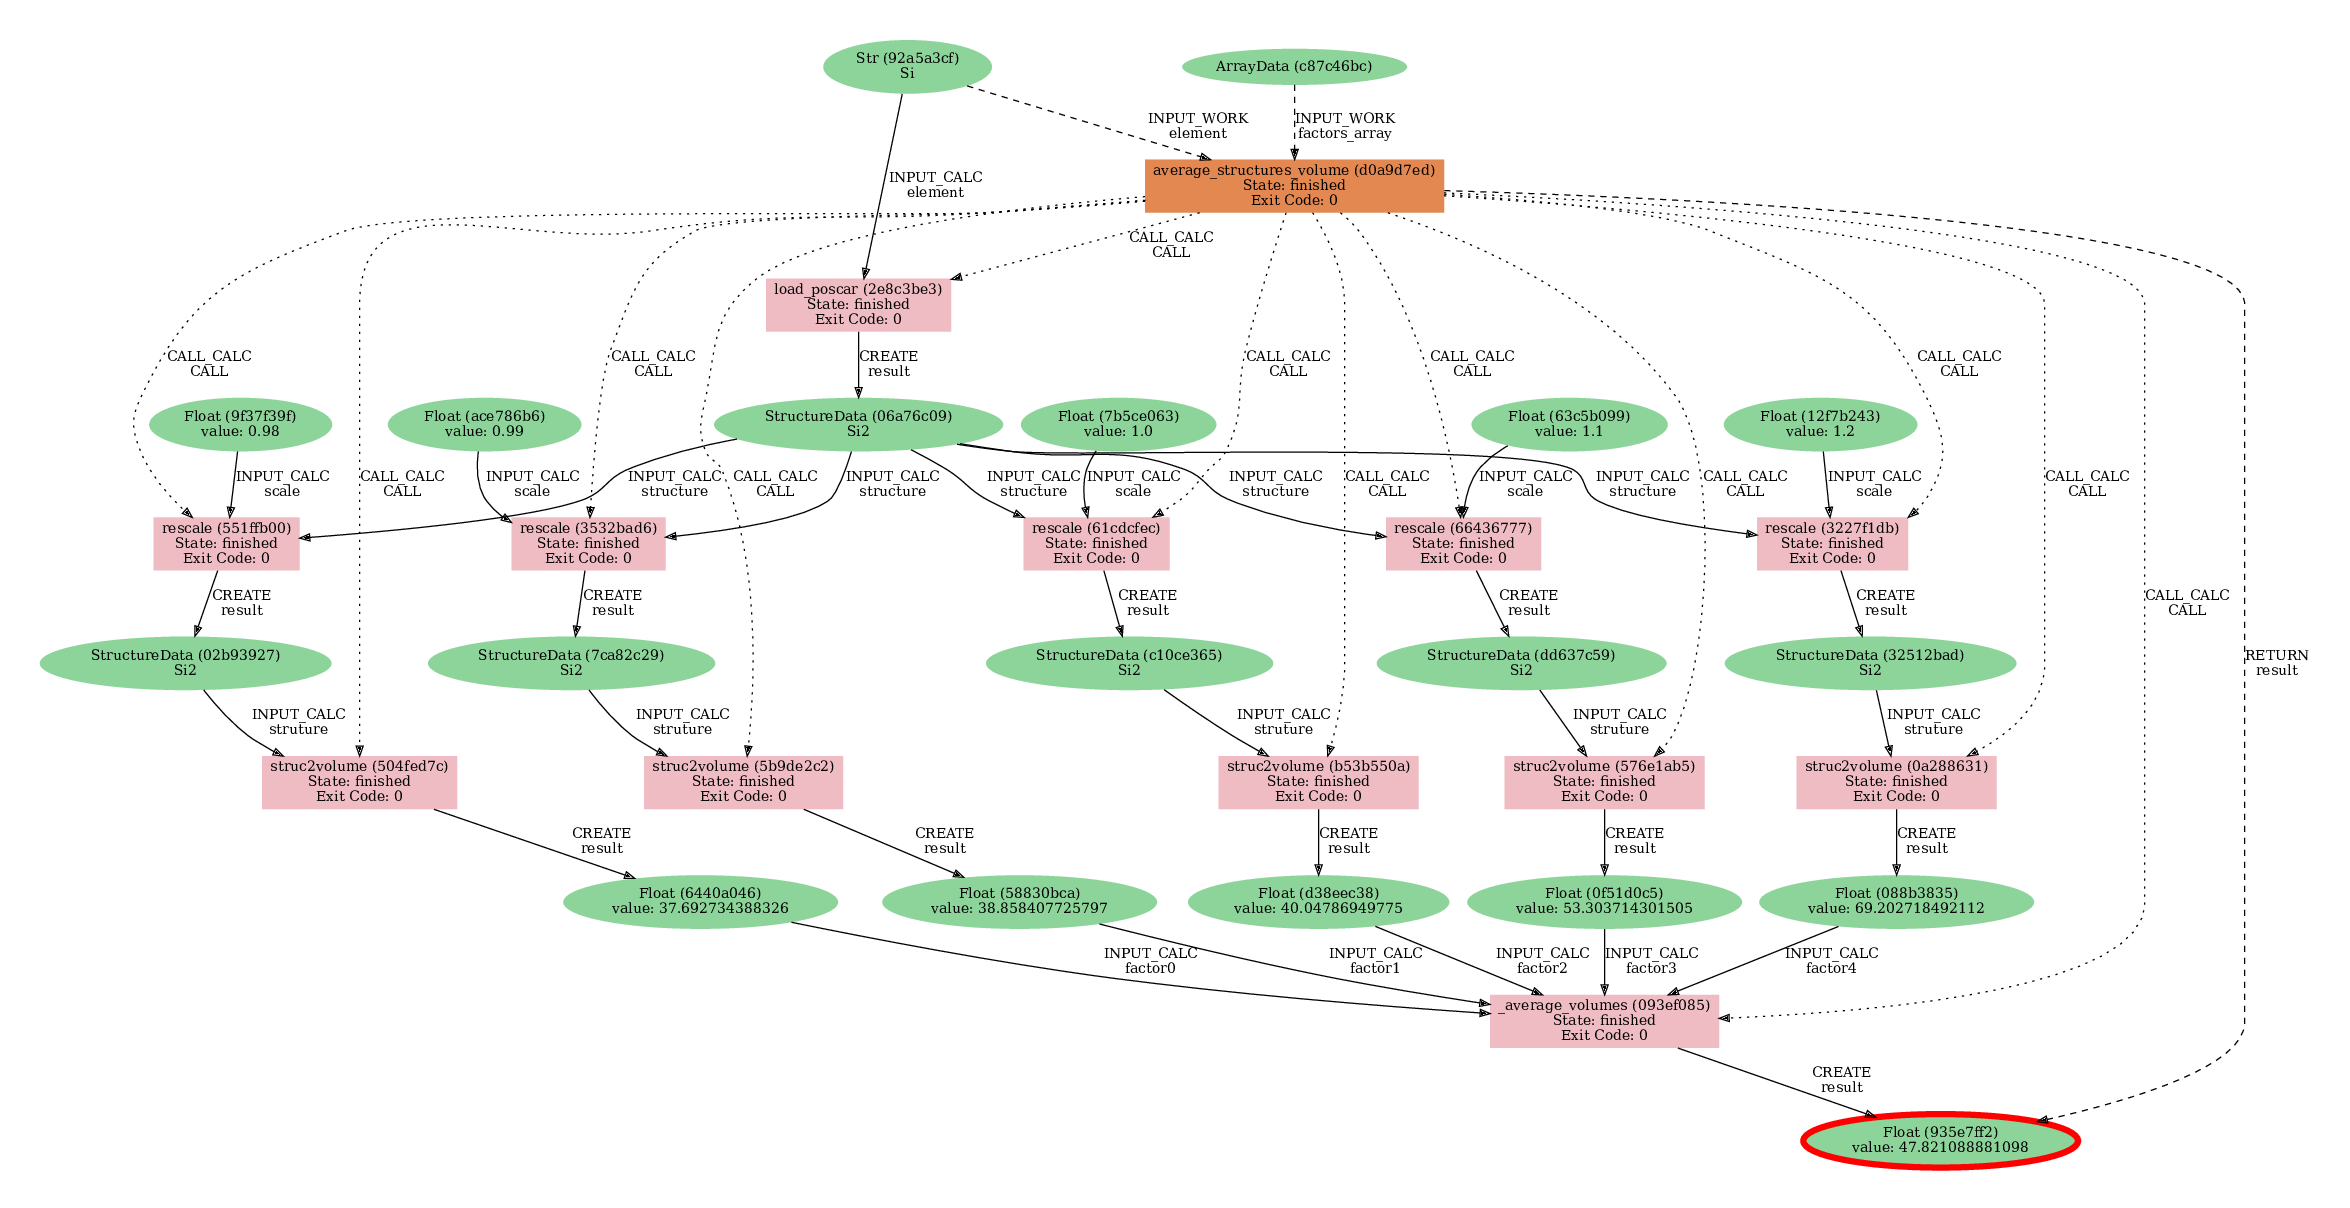

In [14]:
import subprocess
pk = volume_avg.pk
cmd = "verdi node graph generate {}".format(pk)
subprocess.call(cmd,shell=True)

from wand.image import Image as WImage
WImage(filename="{}.dot.pdf".format(pk))